<img src="https://mljar.com/images/machine-learning/random_forest_logo.png">

# Random Forest


---

• **Random Forest** is an *Ensemble*, *supervised learning* algorithm based on *Decision Trees*.    

• ***Ensemble Learning*** is *using multiple algorithms simulataneusly* to achive a higher performance.
  
• So what Random Forest does, is that it uses multiple random decision trees and then **takes the average** of the results and then reports it as the final result.   

* The important note in Random forest is that because of *Feature Randomness* and *Bootstrapping* in making the trees it **will not overfit** the data.

The steps of the Random Forest algorithm for classification can be described as follows.
1. Select random samples from the dataset using bootstrap aggregating.
2. Construct a Decision Tree for each sample, and save the prediction results from each tree.
3. Calculate a vote for each predicted result.
4. Determine which predicted result has the most votes. This becomes your final prediction.

## Hyperparameters in Random Forest

[Scikit-Learn adviced on hyperparameter tuning for Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#parameters)

The most important hyperparameters in a random forest model is:

* `n_estimators`: Number of Decision trees in the forest.
    * fine tuning the number of trees is unnecessary, simply set the number of trees to a large, computationally feasable  number and you’re good to go.
    
    
* `criterion`: The criteria with which to split on the node.
    *  fine tuning the split criteria could lead to different forests, and as there is only two possible values, we recommend trying them both for classification forests.
    
    
* `min_samples_split`: The maximum depth of the individual trees.
    * fine tuning the tree depth is unnecessary, pick a reasonable value and carry on with other hyperparameters.
    
    
* `min_samples_split`: The minimum samples to split on at an internal node of the trees.


* `max_features`: Number of random features to include at each node for splitting.
    *  fine tuning the number of features to consider when splitting at each node is fundamental, therefore it should be considered when using a search approach to find the best hyperparameters for our forest.
    * ```{“sqrt”, “log2”, None}, int or float, default=”sqrt”```

---

# Random Forest Classifier

---

### DATA

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/penguins_size.csv')

In [3]:
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df = df.dropna()

In [6]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [7]:
df.loc[336, 'sex'] = 'FEMALE'

### Train|Test Split


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

### Random-Forest-Classifier-Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=15,     # Default = 100
                               criterion='gini',
                               max_depth=2,         # Default = None
                               min_samples_split=2,
                               max_features='auto', 
                               random_state=42)

In [13]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=15, random_state=42)

In [14]:
from sklearn.tree import plot_tree

In [257]:
# plt.figure(figsize=(12,4), dpi=150)
# plot_tree(model.estimators_[14], feature_names=X.columns);

In [16]:
pd.DataFrame(data=model.feature_importances_, index=X.columns, columns=['feature_importances'])

,feature_importances
culmen_length_mm,0.254994
culmen_depth_mm,0.268992
flipper_length_mm,0.268107
body_mass_g,0.082461
island_Dream,0.114937
island_Torgersen,0.010448
sex_MALE,0.000061


### Evaluation

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[21,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 14]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        22
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       1.00      1.00      1.00        14

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



--- 
---
### Using Elbow Method for correct number of trees:


In [21]:
errs = []

for n in range(1,100):
    model = RandomForestClassifier(n_estimators=n, max_depth=2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test, y_pred)
    errs.append(err)

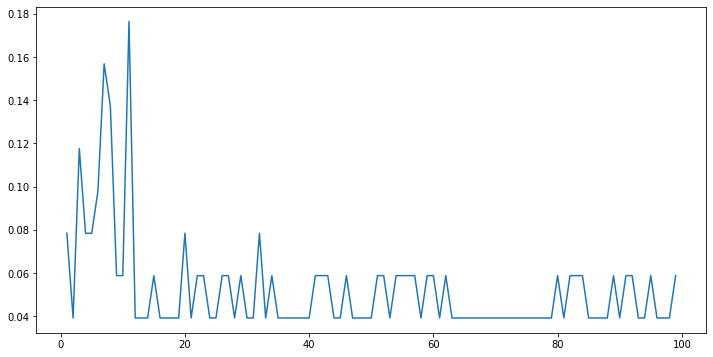

In [22]:
plt.figure(figsize=(12,6))

plt.plot(list(range(1,100)), errs);

We can see that after about 50 trees we got the same result.

---
---

### GridSearchCV for a Random Forest Classifier

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
model = RandomForestClassifier(random_state=101)

params = {
    'n_estimators': [64, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'max_features':[.2, "sqrt", "log2"],
    'bootstrap':[True, False]
}

In [25]:
grid_model = GridSearchCV(estimator=model, param_grid=params)

In [26]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': [0.2, 'sqrt', 'log2'],
                         'n_estimators': [64, 100, 200]})

In [27]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=4, max_features=0.2, n_estimators=64,
                       random_state=101)

In [28]:
grid_model.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 0.2,
 'n_estimators': 64}

In [29]:
y_pred = grid_model.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[21,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 14]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        22
   Chinstrap       0.93      0.93      0.93        15
      Gentoo       1.00      1.00      1.00        14

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



### DATA-2


In [32]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')

In [34]:
df.head(3)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [36]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

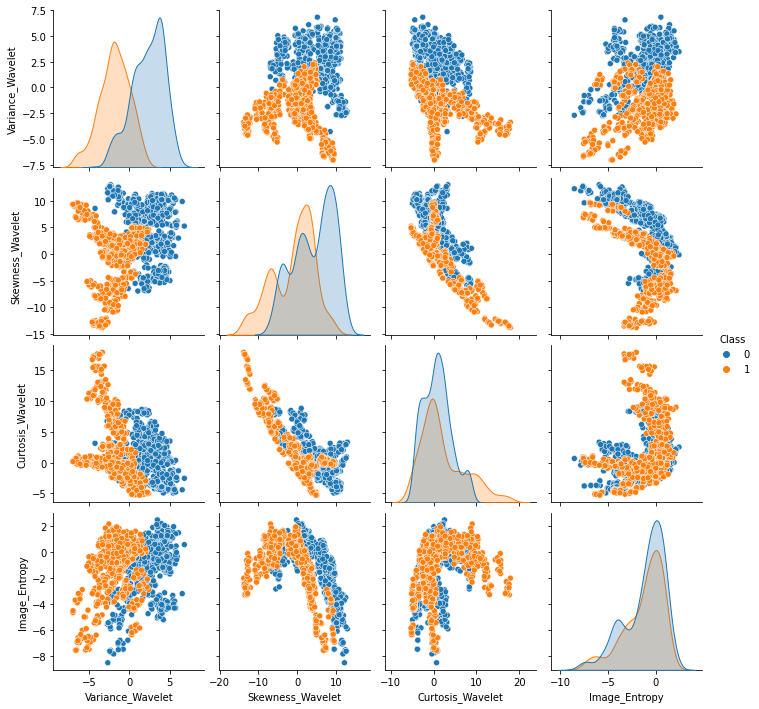

In [40]:
sns.pairplot(data=df, hue='Class');

### Train|Test Split

In [42]:
X = df.drop('Class', axis=1)
y = df['Class']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Grid Model

In [57]:
model = RandomForestClassifier()
params = {
    'n_estimators':[64,100,200],
    'max_depth':[2,3,4],
    'max_features':['sqrt', 'log2', 0.2],
    'criterion':['gini', 'entropy'],
    'bootstrap': [True, False]
}

grid_model = GridSearchCV(model, params)

In [58]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_features': ['sqrt', 'log2', 0.2],
                         'n_estimators': [64, 100, 200]})

In [59]:
grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt')

In [60]:
grid_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [61]:
y_pred = grid_model.predict(X_test)

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       124
           1       0.92      1.00      0.96        82

    accuracy                           0.97       206
   macro avg       0.96      0.97      0.97       206
weighted avg       0.97      0.97      0.97       206



In [63]:
confusion_matrix(y_test, y_pred)

array([[117,   7],
       [  0,  82]], dtype=int64)

---
---
---

# Random Forest Regression
---

### DATA

In [64]:
df = pd.read_csv('../DATA/rock_density_xray.csv')

In [65]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [68]:
df.columns = ['Signal', 'Density']

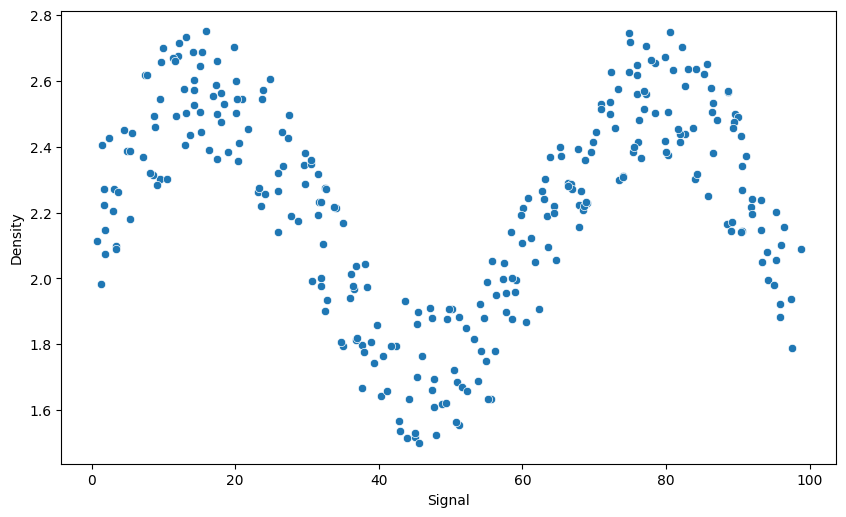

In [75]:
plt.figure(figsize=(10,6), dpi=100)
sns.scatterplot(data=df, x='Signal', y='Density');

### Train|Test Split

In [84]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [97]:
# DATA does not need SCALING

### Random-Forest-Regression-Model

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
model = RandomForestRegressor(n_estimators=100,
                              criterion='squared_error',
                              max_depth=None, 
                              bootstrap=True,
                              oob_score=True,
                              random_state=101)

In [110]:
model.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=101)

In [112]:
model.oob_score_

0.7479985266508461

### Evaluation

In [115]:
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [124]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.3}')
print(f'MSE: {mean_squared_error(y_test, y_pred):0.2}')

MAE: 0.123
MSE: 0.022


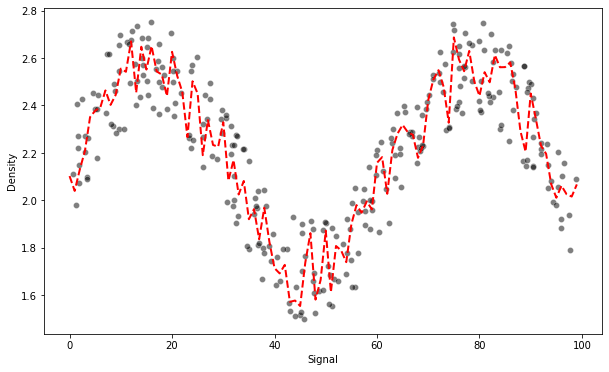

In [141]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Signal', y='Density', data=df, color='black', alpha=0.5)
plt.plot(range(0,100),model.predict(np.array(range(0,100)).reshape(-1,1)), 'r--', lw=2);

It seems like catching some noise!!!

## Explore Other Regression Models

* [Linear Regression](#Linear-Regression)
* [Polynomial Regression](#Polynomial-Regression)
* [KNN Regression](#KNN-Regression)
* [Decision Tree Regression](#Decision-Tree-Regression)
* [SVR](#SVR)

In [200]:
### HELP FUNCTION

def run_model(model, X_train, X_test, y_train, y_test):
    
    # FIT
    model.fit(X_train, y_train)
    
    # PREDICT
    y_pred = model.predict(X_test)
    
    # ERROR METRICS
    mae = mean_absolute_error(y_test, y_pred)
    rms = np.sqrt(mean_squared_error(y_test,y_pred))
    print(f'MAE: {mae}')
    print(f'RMSE: {rms}')
    
    # PLOT
    signal = np.arange(0,101)
    sig_pred = model.predict(signal.reshape(-1,1))
    
    plt.figure(figsize=(9,5), dpi=100)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black', alpha=0.5)
    plt.plot(signal, sig_pred, 'r--', lw=2);

### Linear Regression

In [201]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

MAE: 0.22743045526818492
RMSE: 0.2789327760701736


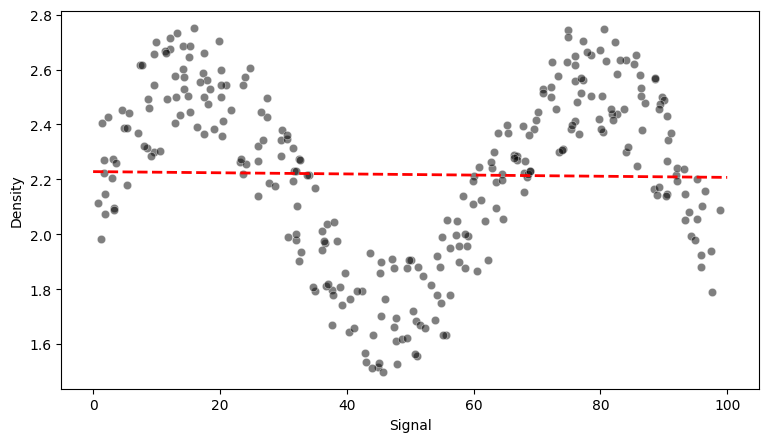

In [202]:
run_model(model, X_train, X_test, y_train, y_test)

### Polynomial Regression

In [203]:
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.pipeline import make_pipeline

MAE: 0.2371909145491606
RMSE: 0.2842763839300095
MAE: 0.24164868722663937
RMSE: 0.2813927343403968
MAE: 0.13076608810109072
RMSE: 0.15579099078106556
MAE: 0.13144053369014352
RMSE: 0.1556902885083392
MAE: 0.12309875843013801
RMSE: 0.14028346157435853


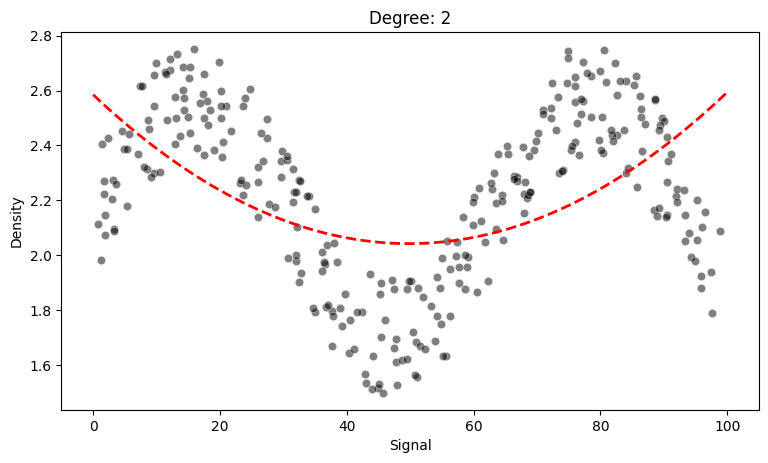

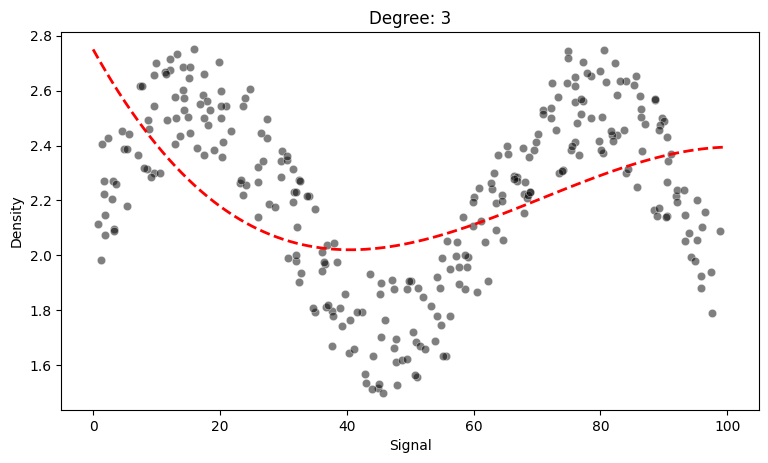

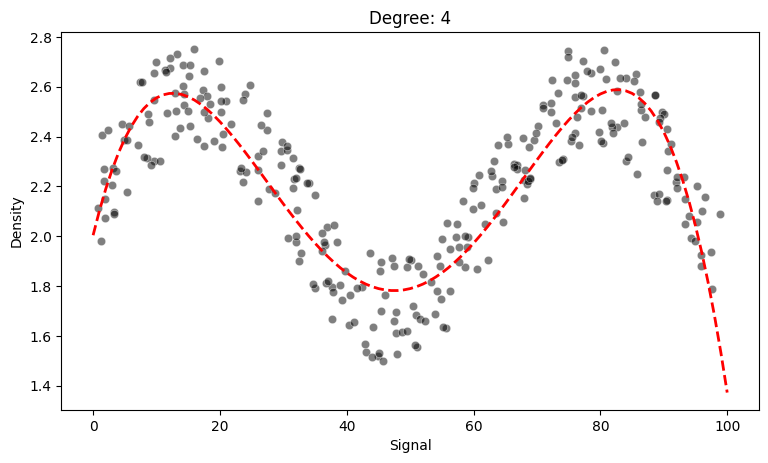

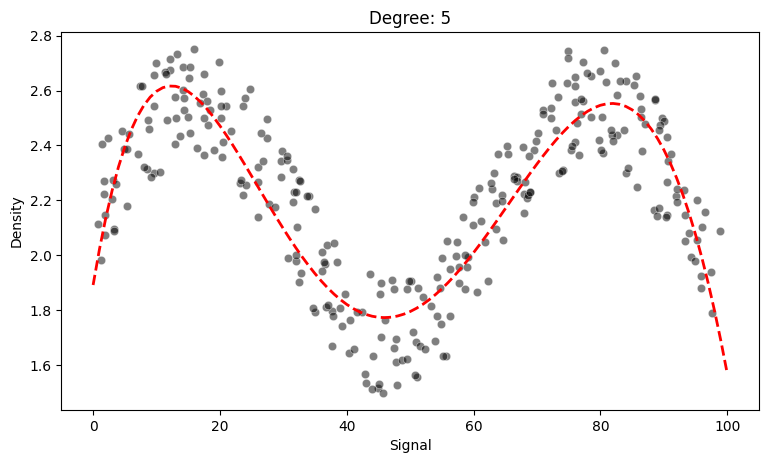

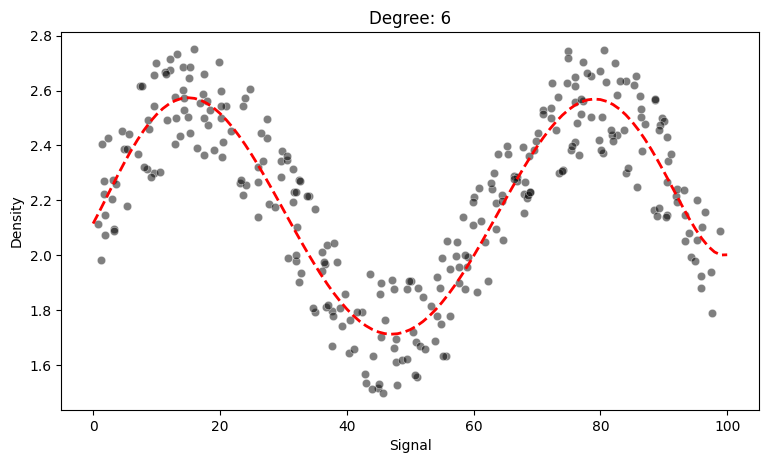

In [204]:
for i in range(2,7):
    pipe = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    
    run_model(pipe, X_train, X_test, y_train, y_test)
    plt.title(f'Degree: {i}')

MAE: 0.12800462259516318
RMSE: 0.14243403134900237


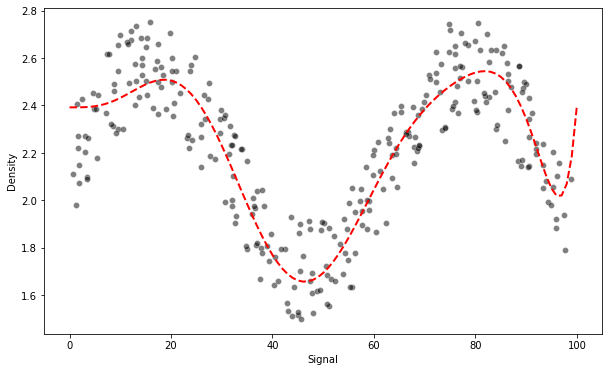

In [165]:
# High degrees

pipe = make_pipeline(PolynomialFeatures(degree=10),LinearRegression())
run_model(pipe, X_train, X_test, y_train, y_test)

### KNN Regression

In [205]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.13102986428081623
RMSE: 0.16520828197645798
MAE: 0.12637237801280085
RMSE: 0.14516199020256743
MAE: 0.11850108352755381
RMSE: 0.13500627931123657
MAE: 0.12198148749965729
RMSE: 0.13974911384109687


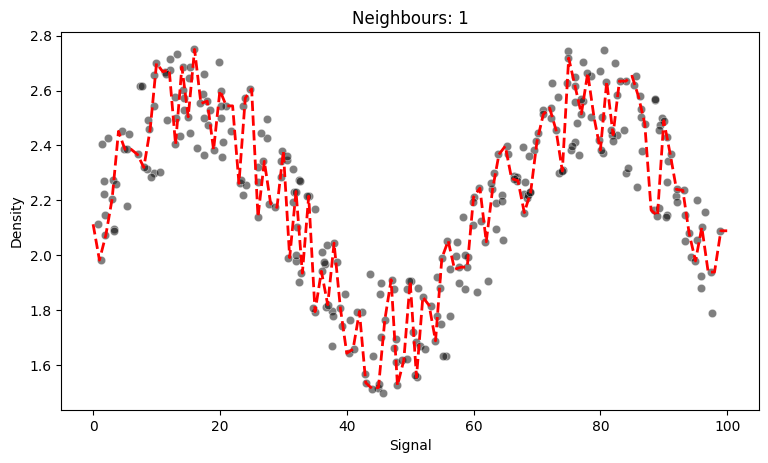

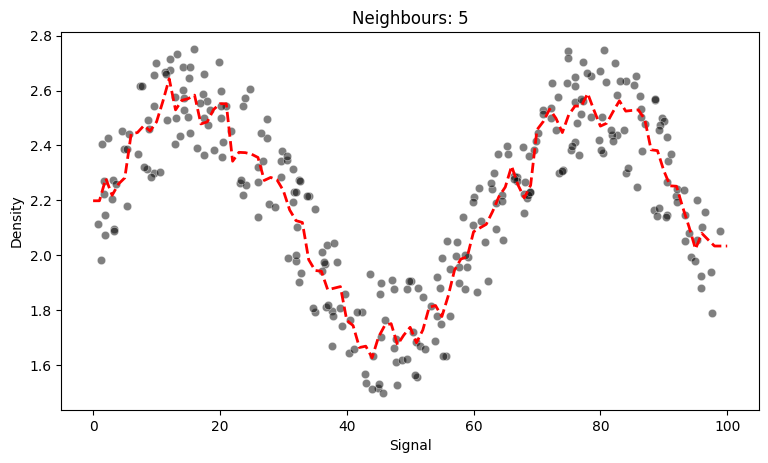

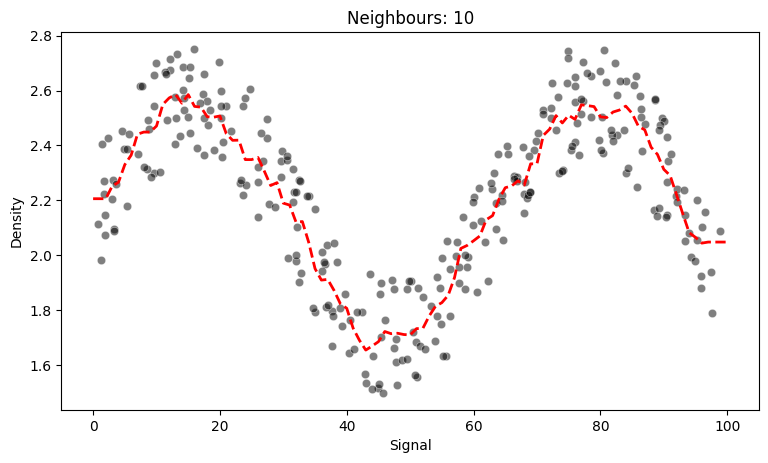

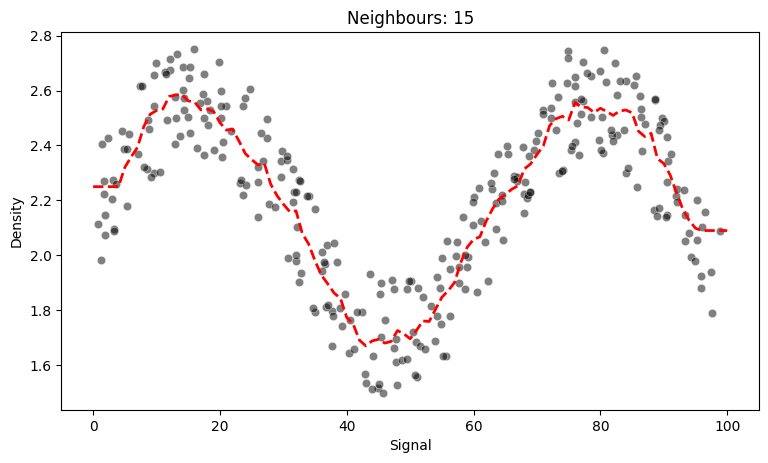

In [208]:
for i in [1,5,10,15]:
    model = KNeighborsRegressor(n_neighbors=i)
    
    run_model(model, X_train, X_test, y_train, y_test)
    plt.title(f'Neighbours: {i}')

MAE: 0.13339915719130455
RMSE: 0.1540157618953597


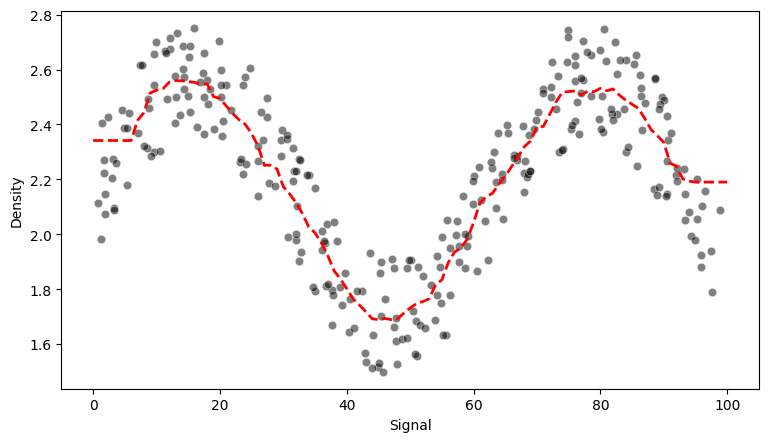

In [218]:
# More Neighbours Less Noise 
# But seems there is a limit

model = KNeighborsRegressor(n_neighbors=25)
run_model(model, X_train, X_test, y_train, y_test)

### Decision Tree Regression

In [219]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.13102986428081623
RMSE: 0.16520828197645798


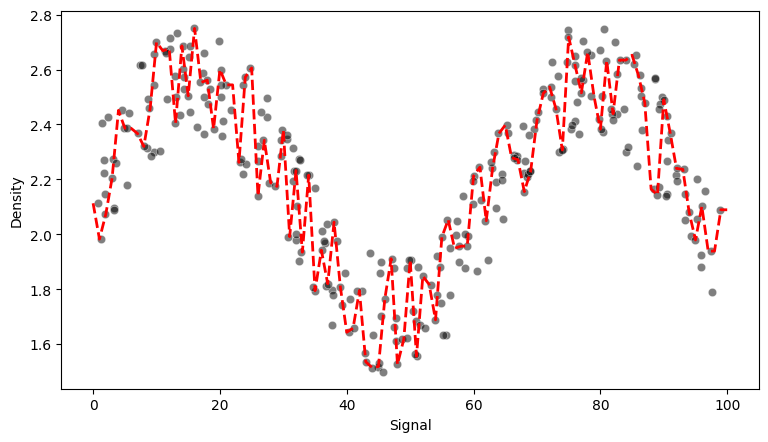

In [221]:
model = DecisionTreeRegressor()
run_model(model, X_train, X_test, y_train, y_test)

MAE: 0.2173363741108574
RMSE: 0.26282264105199404
MAE: 0.1693030173921592
RMSE: 0.22011699123730702
MAE: 0.14645328984870762
RMSE: 0.17358328696191405
MAE: 0.12173420828394468
RMSE: 0.14328192318104363
MAE: 0.12450062493844313
RMSE: 0.14935463725596557


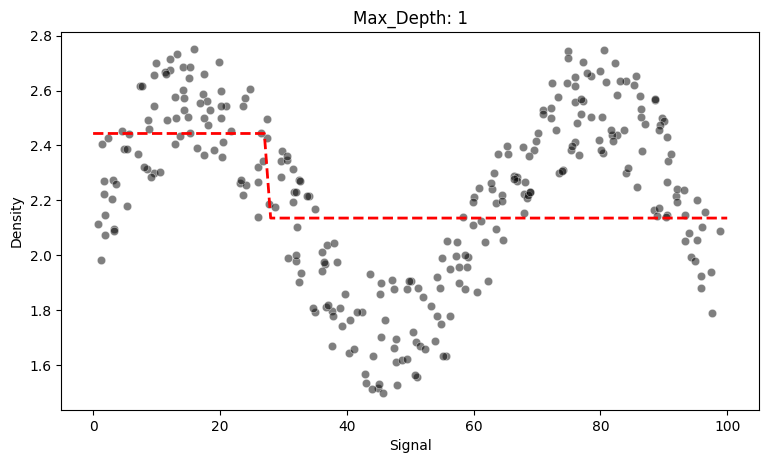

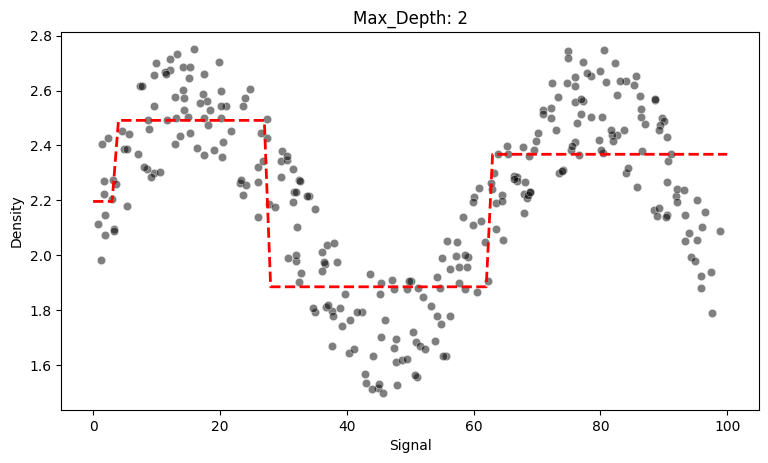

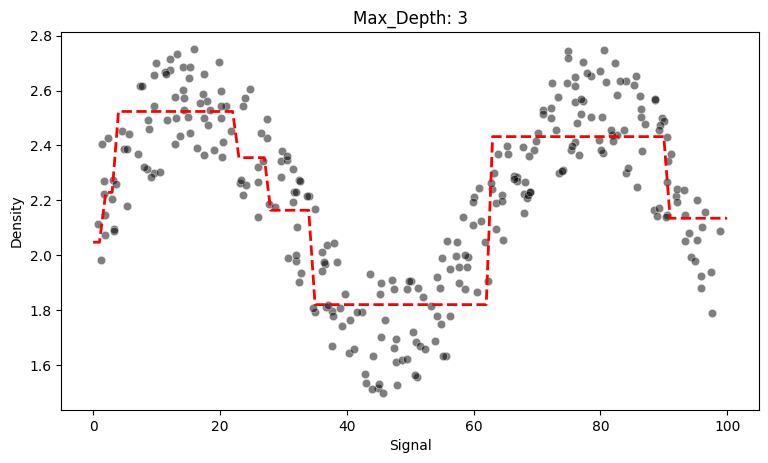

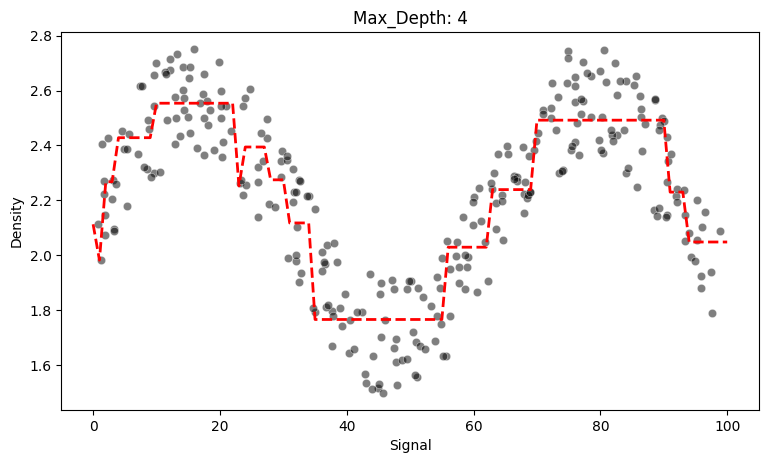

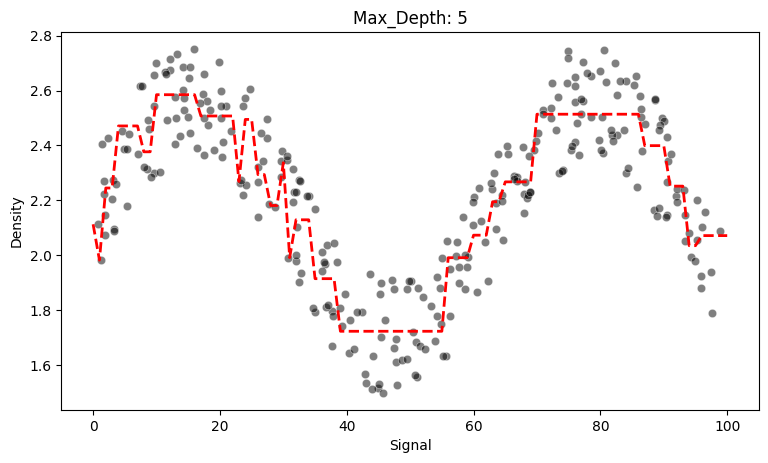

In [238]:
# lots of NOISE

for i in [1,2,3,4,5]:
    model = DecisionTreeRegressor(max_depth=i)
    run_model(model, X_train, X_test, y_train, y_test)
    plt.title(f"Max_Depth: {i}")

Noting Changed after 20

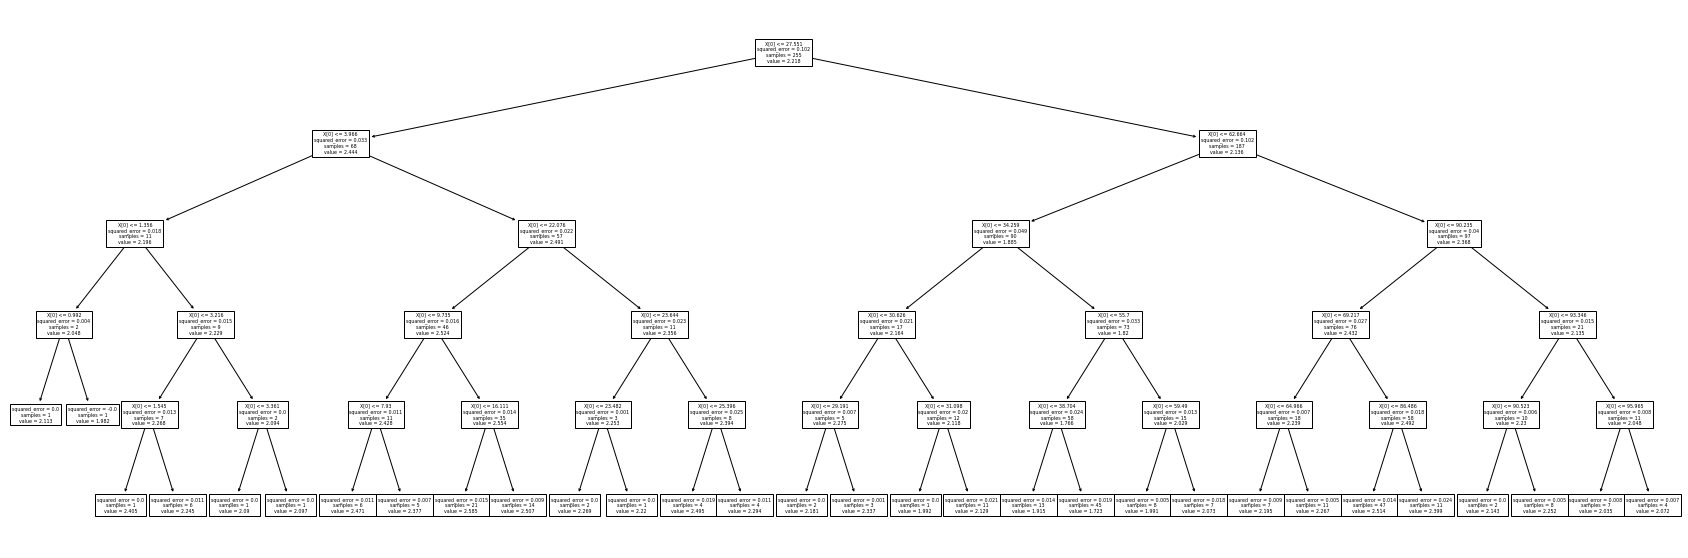

In [239]:
plt.figure(figsize=(30,10))
plot_tree(model);

### SVR

In [240]:
from sklearn.svm import SVR

MAE: 0.1387633802066966
RMSE: 0.15747167274829454
MAE: 0.12500196082462312
RMSE: 0.13928637299823227
MAE: 0.1214484220033677
RMSE: 0.1369188633627369
MAE: 0.11877940198759049
RMSE: 0.13531977519510704


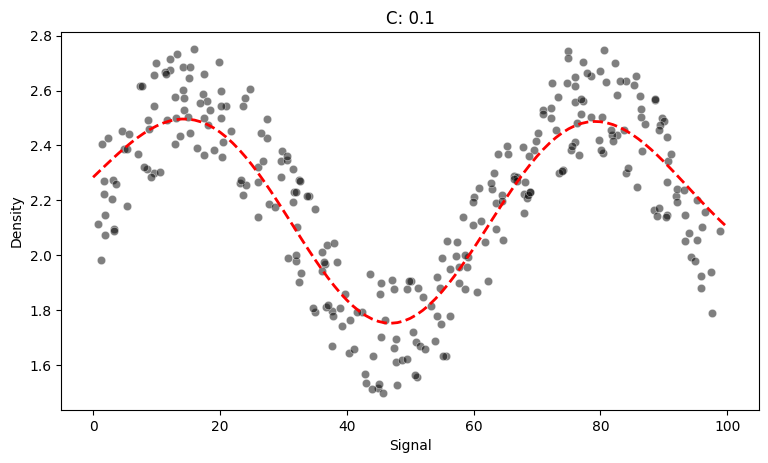

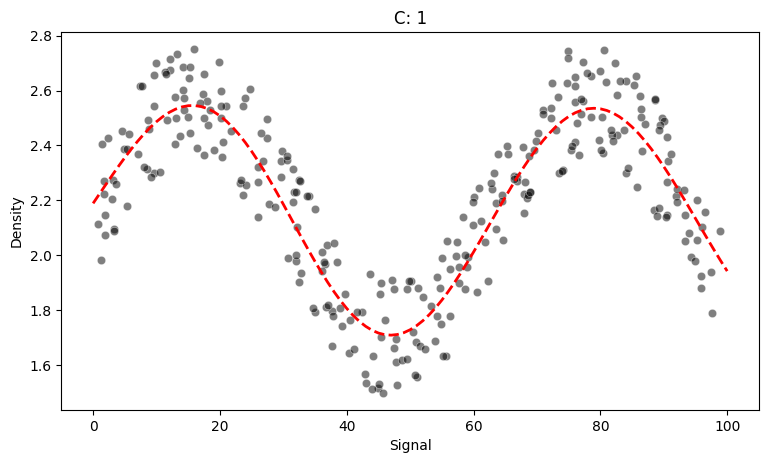

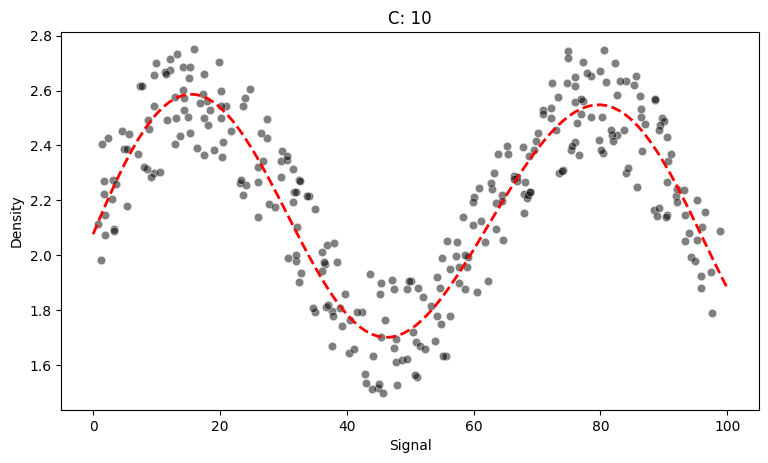

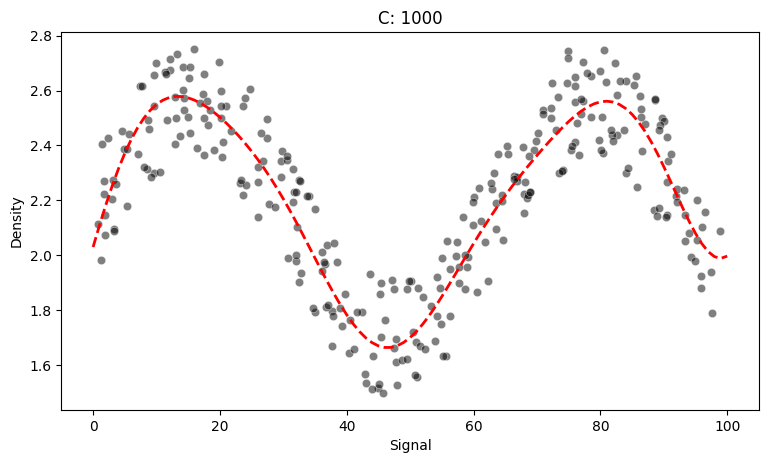

In [256]:
for i in [0.1, 1, 10, 1000]:
    model = SVR(C=i)
    run_model(model, X_train, X_test, y_train, y_test)
    plt.title(f'C: {i}')

In [253]:
### GridSearch for SVR

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [251]:
grid = GridSearchCV(svr, param_grid)

MAE: 0.11877940198759049
RMSE: 0.13531977519510704


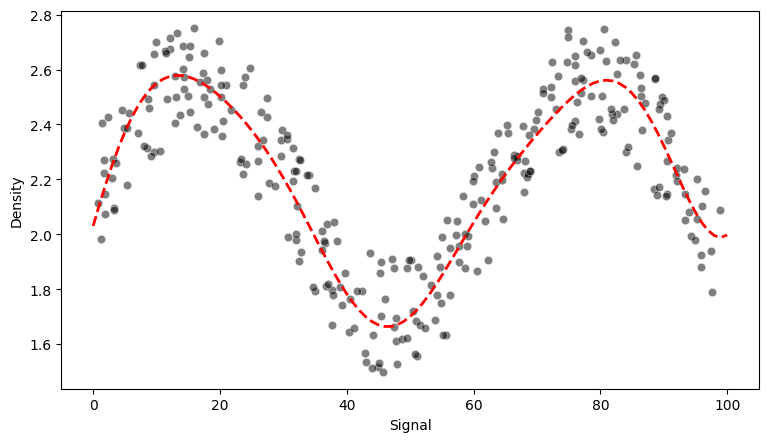

In [252]:
run_model(grid, X_train, X_test, y_train, y_test)

In [254]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}